In [6]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import random
from sklearn import datasets
iris = datasets.load_iris() 
from scipy.spatial import distance

In [7]:
setosa = iris.data[iris.target == 0]
versicolor = iris.data[iris.target == 1]
virginica = iris.data[iris.target == 2]
datka = np.zeros(300).reshape(150,2)
datka[0:50,0] = setosa [:,0]
datka[0:50,1] = setosa [:,1]
datka[50:100,0] = versicolor[:,0]
datka[50:100,1] = versicolor[:,1]
datka[100:150,0] = virginica[:,0]
datka[100:150,1] = virginica[:,1]

    
    
    

0.09700536727905273


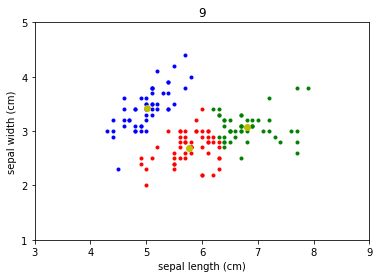

In [8]:
def KMeans(data,numofcl,maxiter):
    (N,M) = data.shape   
    p_of_cl = data[random.sample(range(N),numofcl)] ## generating first clusters
    iteration = 0
    dists = []
    
    def calculate_dist():
        dists = -2 * np.dot(data, p_of_cl.T) + np.array(np.sum(p_of_cl ** 2, axis=1))
        return dists
    
    def calculate_clusters():
        mins = np.argmin(dists,axis=1)
        return mins
    
    def new_centroids():
        center_of_mass = np.zeros(numofcl*2).reshape(numofcl,2) ## new centroids
        how_many=np.zeros(numofcl)
        for j in range(N):
            how_many[mins[j]] +=1

        for i in range(numofcl):
            center_of_mass[i][0] = np.sum(data[:,0][mins==i]) / how_many[i]
            center_of_mass[i][1] = np.sum(data[:,1][mins==i]) / how_many[i]
        
        return center_of_mass
    
    while(iteration < maxiter ):
        iteration +=1
        dists = calculate_dist()
        mins=calculate_clusters()
        old_cl = p_of_cl
        p_of_cl = new_centroids()
        if(np.array_equal(old_cl,p_of_cl)):
            break
    
    plt.plot(data[:,0][mins==0],data[:,1][mins==0],'r.')
    plt.plot(data[:,0][mins==1],data[:,1][mins==1],'g.')
    plt.plot(data[:,0][mins==2],data[:,1][mins==2],'b.')
    plt.plot(p_of_cl[:,0],p_of_cl[:,1],'yo')
    plt.xlim(3,9)
    plt.ylim(1,5)
    plt.yticks(np.arange(1,6,1))
    plt.title(iteration)
    plt.ylabel('sepal width (cm)')
    plt.xlabel('sepal length (cm)')
    
  
    return 0  

czas = time.time()
KMeans(datka,3,100)
print(time.time()-czas)

 
    

In [9]:
maxims=np.ones(150)

